# **Homework 2**
**Name:** Amirhossein Jamali

**GitHub repository:** https://github.com/jamir91/NLP

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [259]:
class DataPreprocessor:
    train_data = pd.DataFrame()
    test_data = pd.DataFrame()

    def __init__(self, address='./data/'):
        self.read_data(address)
        self.plot_distribution()

    def read_data(self, address):
        self.train_data = pd.read_csv(address + 'train.csv', sep='\t', error_bad_lines= False , encoding= 'utf-8')
        self.train_data.drop(self.train_data[self.train_data.category=='category'].index, axis=0, inplace=True)
        self.train_data.dropna(subset=['text'], inplace=True)
        self.test_data = pd.read_csv(address + 'test.csv', sep='\t', error_bad_lines= False , encoding= 'utf-8')
        self.test_data.drop(self.test_data[self.test_data.category=='category'].index, axis=0, inplace=True)
        self.test_data.dropna(subset=['text'], inplace=True)
#         print(self.train_data.info())
#         print('-------------------------------------------------------------')
#         print(self.test_data.info())

    def draw_plot(self, labels, counts, fname):
        font = {"family": "B Nazanin", "size": 15} 
        plt.rc("font", **font)

        persian_labels = [get_display(reshape(label)) for label in labels]
        fig = plt.figure(figsize = (10, 5))
        plt.bar(persian_labels, counts, width = 0.7, color='darkblue')

        for index,data in enumerate(counts):
            plt.text(x=index, y =data+1, s=f"{data}", color='darkgreen', fontdict=dict(fontsize=13))

        plt.savefig(fname, dpi=200)

    def plot_distribution(self):
        labels, counts = np.unique(self.train_data['category'], return_counts=True)
        self.draw_plot(labels, counts, 'train.png')
        print('-------------------------------------------------------------')
        labels, counts = np.unique(self.test_data['category'], return_counts=True)
        self.draw_plot(labels, counts, 'test.png')

    def clean_text(self):
        pass

    def count_words(self):
        pass

    def mao_word_index(self):
        pass

    def tokenize(self):
        pass

In [227]:
import pandas as pd

train_df = pd.read_csv('./data/train.csv', sep='\t', error_bad_lines= False , encoding= 'utf-8')
test_df = pd.read_csv('./data/test.csv', sep='\t', error_bad_lines= False , encoding= 'utf-8')

print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117192 entries, 0 to 117191
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   link       117192 non-null  object
 1   title      117161 non-null  object
 2   code_news  117161 non-null  object
 3   category   117161 non-null  object
 4   date       117161 non-null  object
 5   text       97030 non-null   object
dtypes: object(6)
memory usage: 5.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21104 entries, 0 to 21103
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   link       21104 non-null  object
 1   title      21099 non-null  object
 2   code_news  21099 non-null  object
 3   category   21099 non-null  object
 4   date       21099 non-null  object
 5   text       17502 non-null  object
dtypes: object(6)
memory usage: 989.4+ KB
None


In [98]:
train_df[train_df.category=='category']

,link,title,code_news,category,date,text


In [97]:
train_df.drop(train_df[train_df.category=='category'].index, axis=0, inplace=True)
train_df.dropna(subset=['text'], inplace=True)

In [99]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97022 entries, 0 to 117191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   link       97022 non-null  object
 1   title      97022 non-null  object
 2   code_news  97022 non-null  object
 3   category   97022 non-null  object
 4   date       97022 non-null  object
 5   text       97022 non-null  object
dtypes: object(6)
memory usage: 5.2+ MB


In [204]:
train_df.groupby('category').size()

category
اجتماعی        11069
اقتصادی         9583
بین‌الملل      22767
سیاسی          13647
علمی پزشکی      9938
فرهنگی هنری    12136
فضای مجازی      1936
فیلم و صوت       375
وب‌گردی         1297
ورزشی          14274
dtype: int64

In [137]:
labels, counts = np.unique(train_df['category'], return_counts=True)
print(labels[7], counts[7])


فیلم و صوت  375


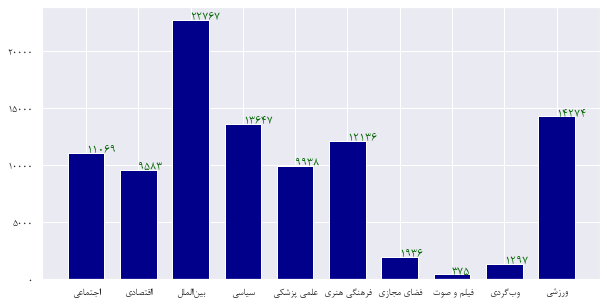

In [260]:
train_df.isnull().sum()

link             0
title           31
code_news       31
category        31
date            31
text         20162
dtype: int64

In [92]:
train_df[train_df['category'].isnull()]['link']

11193     /fa/news/4994849/هیچ-گونه-تناسبی-میان-جمعیت-ای...
13719     /fa/news/5318715/آیا-از-سخت-افزار-رایانه-چیزی-...
20816     /fa/news/2244953/دليل-منطقي-براي-افزايش-قيمت-ب...
23209     /fa/news/4699233/ديپلماسي-انرژي-و-توسعه-زنجيره...
25145     /fa/news/2143701/70-درصد-در-مصرف-انرژي-صرفه-جو...
25708     /fa/news/4296633/تخفيف-10-درصدي-تعرفه-بيمه-نام...
26172     /fa/news/6590290/قیمت-نهاده‌های-دامی-همچنان-با...
26707     /fa/news/4994056/زیبایی-های-شگفت-انگيز-جزیره-ی...
27014     /fa/news/2362357/روند-مثبت-در-انتظار-بازار-سرم...
27878     /fa/news/6550062/ورود-ارز-همراه-مسافر-تنها-تا-...
33404     /fa/news/4906898/رئیس-کمیته-روابط-خارجی-کنگره-...
34613     /fa/news/6709954/کشف-بسته-مشکوک-در-دفتر-عضو-دم...
38967     /fa/news/5039955/داعشی‌ها-صدها-قبر-ايزدی‌ها-را...
39630     /fa/news/4727929/تهران-برای-گسترش-روابط-با-کیف...
42770        /fa/news/4201833/كريسمس-با-طعم-بحران-انگليسي\n
52270     /fa/news/4959010/شلیک-4600-موشک-به-اسرائیل-در-...
53801     /fa/news/4072824/گراميداشت-ياد

In [15]:
def sent_tokenizer(text):
    # sentence separators: ؟ . ! ?
    seperators = "؟.!?"
    pattern = r"[^{0}]+[{0}]".format(seperators)
    return re.findall(pattern, text)

In [16]:
def word_tokenizer(sent):
    seperators = "؟!.?,:;، \t"
    pattern = r"([^{0}]+)([{0}])".format(seperators)

    words_sep = re.findall(pattern, sent)
    words = [w for word, sep in words_sep for w in [word, sep] if w != " "]
    return words

In [17]:
import re
tokenized = [word_tokenizer(sent) for sent in sent_tokenizer(train_df['text'][200])]
tokenized[3]

['\xa0وی',
 'افزود',
 ':',
 'ساناز',
 'زمانی(گروه',
 'سوشیانت)',
 'دستیار',
 'کارگردان',
 '،',
 'نادر',
 'بهرامی',
 'عکاس',
 '،',
 'شبنم',
 'موتابی',
 'و',
 'مرضیه',
 'زهیری',
 'روابط',
 'عمومی',
 'و',
 'گروه',
 'آلوکاد',
 'به',
 'اجرای',
 'موسیقی',
 'دراین',
 'نمایش\u200cنامه',
 'خوانی',
 'می\u200cپردازند',
 '.']

In [18]:
! pip install hazm

In [23]:
from __future__ import unicode_literals
from hazm import Normalizer, Stemmer, Lemmatizer, word_tokenize

In [20]:
word_tokenizer(sent) for sent in sent_tokenizer(train_df['text'][200])

SyntaxError: invalid syntax (<ipython-input-20-d6719a8660e0>, line 1)

In [35]:
normalizer = Normalizer()
tokenized = normalizer.normalize(train_df['text'][200])
print(tokenized)
tokenized = word_tokenize(tokenized)
print(tokenized)
stemmer = Stemmer()
for i in tokenized:
    print(stemmer.stem(i))
    
# tokenized = stemmer.stem(train_df['text'][200])

print(stemmer.stem('دستان'))

# print(tokenized)

 پیروز کرمی کارگردان نمایش نامه‌خوانی «زندگی او» در گفتگو با خبرنگار رادیو و تلویزیون باشگاه خبرنگاران گفت: این نمایش نامه به قلم ترانه برومند نوشته شده که داستان مردی را روایت می‌کند که در آستانه یکی از مأموریت‌های کاری خود از طریق دوست و کشیش متوجه مرگ همسر خود می‌گردد، سفر نیمه کاره می‌ماند و در راه این بازگشت به رازهای پنهانی از زندگی خود پی می‌برد. وی اظهار داشت: بازیگرانی چون کامبیز دیرباز، عمار تفتی، یکتا ناصر، نازنین گودرزیان، ساناز زمانی (بازیگر میهمان از گروه سوشیانت)، عباس ستارزاده و سینا افشار به ترتیب خوانش در صحنه حضور می‌یابند. وی بیان کرد: نمایش نامه‌خوانی «زندگی او» به نفع انجمن بیماری کودکان سندروم پروانه‌ای (EB) ۱۶ آذر اجرا می‌شود. وی افزود: ساناز زمانی (گروه سوشیانت) دستیار کارگردان، نادر بهرامی عکاس، شبنم موتابی و مرضیه زهیری روابط عمومی و گروه آلوکاد به اجرای موسیقی دراین نمایش‌نامه خوانی می‌پردازند. وی اظهار داشت: نمایش نامه‌خوانی «زندگی او» شنبه ۱۶ آذر ساعت ۲۰ در فرهنگسرای ارسباران واقع در پل سیدخندان خیابان جلفا به روی صحنه خواهد رفت. وی عنوان کرد: مخاطبان می‌ت

c:\users\amirhossein\pycharmprojects\nlp\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\amirhossein\pycharmprojects\nlp\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


-------------------------------------------------------------


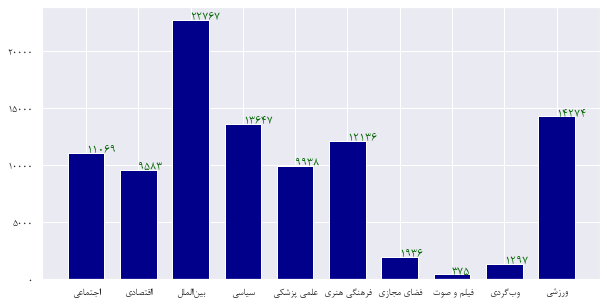

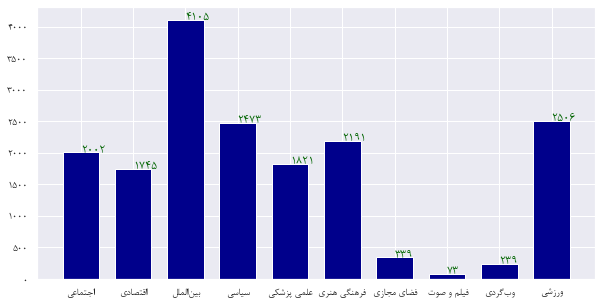

In [261]:
if __name__ == '__main__':
    dp = DataPreprocessor()